The aim of this notebook is to understand the various learnt latent factors.

In [2]:
import numpy as np
import pandas as pd
import sys
from common import compute_rmse_fraction


In [14]:
from mf_core import *

import numpy as np
import pandas as pd
import sys
from create_matrix import *
from sklearn.model_selection import LeaveOneOut

import pickle
from tensor_custom_core import *
from degree_days import dds

In [74]:
def learn_lf(region, year, a, b):
    APPLIANCES = ['fridge', 'hvac', 'wm', 'mw', 'oven', 'dw']


    def un_normalize(x, maximum, minimum):
        return (maximum-minimum)*x + minimum





    pred = {}
    lat = {}
    for appliance in APPLIANCES[:]:
        lat[appliance] = {}
        pred[appliance] = {}
        if appliance == "hvac":
            start, stop = 5, 11
        else:
            start, stop = 1, 13
        months = stop - start
        pred[appliance] = {}
        appliance_df = create_matrix_region_appliance_year(region, year, appliance, all=False)
        aggregate_cols = [x for x in appliance_df.columns if "aggregate" in x]
        appliance_cols = [x for x in appliance_df.columns if appliance in x]
        energy_cols = np.concatenate([aggregate_cols, appliance_cols])

        df = appliance_df.copy()
        dfc = df.copy()
        static_cols = ['area', 'total_occupants', 'num_rooms']
        static_df = df[static_cols]
        static_df = static_df.div(static_df.max())
        weather_values = np.array(dds[2014]['Austin'][start-1:stop-1]).reshape(-1,1)

        df = df[energy_cols]
        col_max = df.max().max()
        col_min = df.min().min()
        df = (1.0*(df-col_min))/(col_max-col_min)
        print df.describe()
        tensor = df.values.reshape((len(df), 2, months))
    
        M, N, O = tensor.shape
        print M, N, O
        mask = np.ones(M).astype('bool')

        case=2
        pred[appliance][case] = {}
        for a in range(1, 6):
            lat[appliance][a] = {}
            print "*"*20
            print a, case, appliance
            print "*"*20

            b = a
            pred[appliance][case][a] = {}
            for i, home in enumerate(df.index[:1]):


                tensor_copy = tensor.copy()
                tensor_copy[i, 1, :]=np.NaN
                H, A, T = learn_HAT(case, tensor_copy, a, a, num_iter=2000, lr=0.1, dis=False, cost_function='abs',
                                    H_known=static_df.values[:,:a])
                lat[appliance][a]['T'] = T
                lat[appliance][a]['A'] = A
                lat[appliance][a]['H'] = H
    return lat


In [75]:
%matplotlib inline

In [76]:
lat_sd = learn_lf('SanDiego', 2014, 3, 3)

       aggregate_1  aggregate_2  aggregate_3  aggregate_4  aggregate_5  \
count    20.000000    25.000000    27.000000    28.000000    35.000000   
mean      0.194262     0.166073     0.242901     0.242264     0.307896   
std       0.120995     0.108485     0.139808     0.142373     0.176196   
min       0.000779     0.002375     0.075035     0.065836     0.077360   
25%       0.121365     0.124581     0.139429     0.132520     0.173521   
50%       0.156221     0.143205     0.185854     0.211941     0.253810   
75%       0.317446     0.236359     0.321888     0.338436     0.407706   
max       0.371785     0.350720     0.707648     0.699491     0.774972   

       aggregate_6  aggregate_7  aggregate_8  aggregate_9  aggregate_10  \
count    35.000000    37.000000    36.000000    33.000000     30.000000   
mean      0.289319     0.400148     0.442438     0.488348      0.326873   
std       0.181512     0.231807     0.252178     0.269567      0.156596   
min       0.086280     0.022727  

********************
2 2 mw
********************
********************
3 2 mw
********************
********************
4 2 mw
********************
********************
5 2 mw
********************
       aggregate_1  aggregate_2  aggregate_3  aggregate_4  aggregate_5  \
count    20.000000    25.000000    27.000000    28.000000    35.000000   
mean      0.194401     0.166217     0.243032     0.242395     0.308016   
std       0.120974     0.108467     0.139783     0.142348     0.176165   
min       0.000952     0.002548     0.075195     0.065998     0.077520   
25%       0.121517     0.124733     0.139578     0.132670     0.173664   
50%       0.156368     0.143354     0.185995     0.212077     0.253939   
75%       0.317564     0.236491     0.322006     0.338551     0.407809   
max       0.371894     0.350833     0.707698     0.699543     0.775011   

       aggregate_6  aggregate_7  aggregate_8  aggregate_9  aggregate_10  \
count    35.000000    37.000000    36.000000    33.000000     

In [28]:
lat_austin = learn_lf('Austin', 2014, 3, 3)

********************
1 2 fridge
********************
********************
2 2 fridge
********************
********************
3 2 fridge
********************
********************
4 2 fridge
********************
********************
5 2 fridge
********************
********************
1 2 hvac
********************
********************
2 2 hvac
********************
********************
3 2 hvac
********************
********************
4 2 hvac
********************
********************
5 2 hvac
********************
********************
1 2 wm
********************
********************
2 2 wm
********************
********************
3 2 wm
********************
********************
4 2 wm
********************
********************
5 2 wm
********************
********************
1 2 mw
********************
********************
2 2 mw
********************
********************
3 2 mw
********************
********************
4 2 mw
********************
********************
5 2 mw
***********

In [7]:
import seaborn as sns

In [77]:
dds[2014]['Austin']

[0.012706480304955527,
 0.07369758576874205,
 0.09148665819567979,
 0.30495552731893266,
 0.5184243964421855,
 0.832274459974587,
 0.9085133418043202,
 1.0,
 0.747141041931385,
 0.4650571791613723,
 0.054637865311308764,
 0.03430749682337993]

In [83]:
import matplotlib.pyplot as plt

In [78]:
lat = {'Austin':lat_austin,'SanDiego':lat_sd}

In [84]:
def append_weather(df, appliance, region):
    if appliance=="hvac":
        start, stop = 5, 11
    else:
        start, stop = 1, 13
    degree_days = dds[2014][region][start-1:stop-1]
    df.loc['Degree Days \n(Normalised)'] = degree_days
    return df

def append_mean_energy(df, appliance):
    appliance_df = create_matrix_region_appliance_year(region, year, appliance,all=True)
    appliance_cols = [x for x in appliance_df.columns if appliance in x]
    appliance_df = appliance_df[appliance_cols]
    appliance_df.columns = range(len(appliance_cols))
    appliance_energy = appliance_df.mean().div(appliance_df.mean().max())
    df.loc['Mean Energy \n(Normalised)'] = appliance_energy
    return df
    

def plot_heatmap_correlation(appliance="fridge", num_factors=1, region="Austin"):    
    appliance="fridge"
    num_factors=1
    df = pd.DataFrame(lat[region][appliance][num_factors]['T']).T
    df.index = ['Latent_'+str(x) for x in df.index]
    df = append_weather(df, appliance, 'SanDiego')
    df = append_mean_energy(df, appliance)

    sns.heatmap(df, annot=True)
    plt.figure()
    sns.heatmap(df.T.corr(), annot=True)

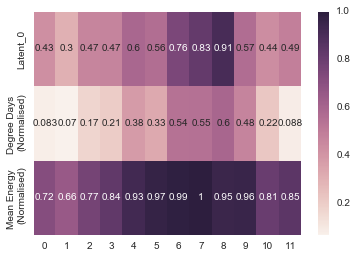

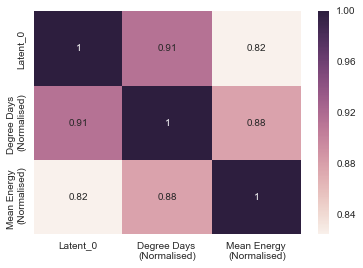

In [86]:
plot_heatmap_correlation('hvac',1,'SanDiego')

In [125]:
lat_sd['fridge'][1]['A'][:]

array([[[ 0.82375844]],

       [[ 0.08444968]]])

In [126]:
lat_austin['fridge'][1]['A'][:]

array([[[ 0.47757878]],

       [[ 0.02489019]]])

In [94]:
0.73/.24

3.0416666666666665

In [95]:
0.60/.21

2.857142857142857